<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/auduvignac/challengedata_ens_AssurPrime/blob/main/notebooks/exploration/exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

##Installation de category-encoder

In [1]:
!pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.7 MB/s eta 0:00:00


##Importation des bibliothèques

In [2]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
pd.set_option('display.max_columns', 375)
import numpy as np
from category_encoders import CountEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

##Chargement des données

In [3]:
# Charger les données
try:
  print("Chargement des données...")
  X_train_url = "https://media.githubusercontent.com/media/auduvignac/challengedata_ens_AssurPrime/refs/heads/main/data/raw/x_train.csv"
  X_train = pd.read_csv(X_train_url)
  y_train_url = "https://media.githubusercontent.com/media/auduvignac/challengedata_ens_AssurPrime/refs/heads/main/data/raw/y_train.csv"
  y_train = pd.read_csv(y_train_url)
  X_test_url = "https://media.githubusercontent.com/media/auduvignac/challengedata_ens_AssurPrime/refs/heads/main/data/raw/x_test.csv"
  X_test = pd.read_csv(X_test_url)
  print("Données chargées avec succès.")
except:
  print("Erreur lors du chargement des données. Vérifiez que les URLs sont correctes.")

Chargement des données...


<ipython-input-3-c5aaf42838da>:5: DtypeWarning: Columns (16,17,29,30,31,126,128,129,132,133,135,138,371) have mixed types. Specify dtype option on import or set low_memory=False.
  X_train = pd.read_csv(X_train_url)
<ipython-input-3-c5aaf42838da>:9: DtypeWarning: Columns (16,17,29,30,31,126,128,129,132,133,135,138,371) have mixed types. Specify dtype option on import or set low_memory=False.
  X_test = pd.read_csv(X_test_url)


Données chargées avec succès.


In [4]:
# Traitement des valeurs manquantes dans les colonnes numériques
print("Traitement des valeurs manquantes dans les colonnes numériques...")
numeric_columns = X_train.select_dtypes(include=['number']).columns

# Remplir les NaN avec 0 pour les colonnes numériques
X_train[numeric_columns] = X_train[numeric_columns].fillna(0)

# Identifier les colonnes non numériques
fill_cols = [item for item in X_train.columns if item not in numeric_columns]

# Remplir les NaN des colonnes non numériques avec une valeur par défaut (-999)
X_train[fill_cols] = X_train[fill_cols].fillna(-999)

print("Traitement des valeurs manquantes terminé.")

Traitement des valeurs manquantes dans les colonnes numériques...
Traitement des valeurs manquantes terminé.


In [5]:
# Préparation des données pour l'entraînement
print("Préparation des données pour l'entraînement...")

# Suppression des colonnes inutiles
X_train = X_train.drop(['ID', 'ANNEE_ASSURANCE'], axis=1)

# Encodage des variables catégoriques avec CountEncoder
encoder = CountEncoder(cols=fill_cols)
encoder.fit(X_train)
X_train_enc = encoder.transform(X_train)

print("Préparation terminée.")

Préparation des données pour l'entraînement...
Préparation terminée.


##Analyse de la distribution des cibles CM et FREQ

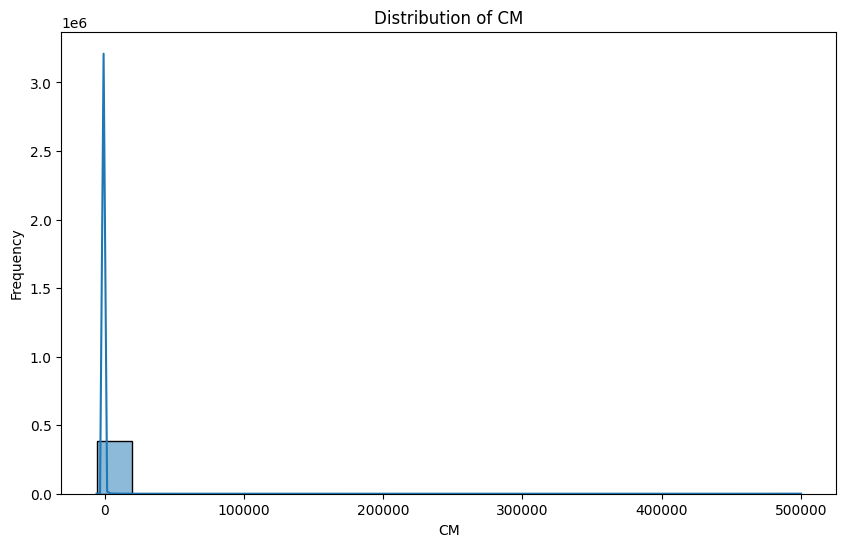

In [6]:
# Graphe de distribution de y_train['CM']

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y_train['CM'], kde=True)  # Use histplot for distribution
plt.title('Distribution of CM')
plt.xlabel('CM')
plt.ylabel('Frequency')
plt.show()


###Commentaires :
la distribution est très déséquilibrée et mérite une analyse plus précise en listant les valeurs de CM

In [7]:
# Frequence (nombre d'occurrence) de chaque valeur de y_train['CM'] par ordre croissant de CM
pd.set_option('display.max_rows', None)

cm_frequencies = y_train['CM'].value_counts().sort_index()

# Print des fréquences
cm_frequencies

,count
CM,
-5751.000000,1
-5631.360000,1
-1918.000000,1
-342.660000,1
-216.950000,1
-6.160000,1
0.000000,381252
1.000000,1
17.500000,1


###Commentaires :
Nous constatons que **381252 lignes ont une valeur CM = 0**.

Par ailleurs, nous observons 6 valeurs négatives étranges pour un coût moyen (il peut s'agir de régularisation de comptes suite à des trop versés, ...). A voir si on conservera ces quelques observations pour l'entrainement de CM.

Il convient à présent d'analyser ce qu'il en est de FREQ.

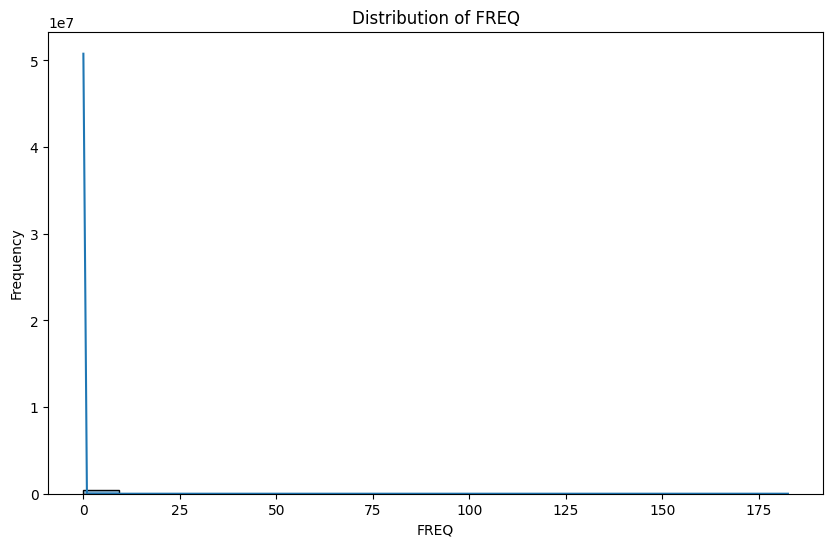

In [8]:
# Graphe de distribution de y_train['FREQ']

plt.figure(figsize=(10, 6))
sns.histplot(y_train['FREQ'], kde=True)  # Use histplot for distribution
plt.title('Distribution of FREQ')
plt.xlabel('FREQ')
plt.ylabel('Frequency')
plt.show()


###Commentaires :
On observe une distribution semblable à CM. Vérifions avec les valeurs.

In [9]:
# Frequence (nombre d'occurrence) de chaque valeur de y_train['FREQ'] par ordre croissant de FREQ

freq_frequencies = y_train['FREQ'].value_counts().sort_index()

# Print des frequence de chaque FREQ par ordre croissant
freq_frequencies


,count
FREQ,
0.000000,380716
0.968170,1
1.000000,1446
1.002747,3
1.005510,1
1.008287,2
1.011080,3
1.013889,3
1.016667,1


###Commentaires :
Nous observons que 380716 lignes ont une valeur FREQ = 0.

Nous sommes donc dans le cas d'une base de données des contrats d'assurance qui ne recense que les sinsitres incendies, pour laquelle sur 383610 contrats, 380716 n'ont eu aucun sinistres et donc aucun coût de sinistre.

Heureusement, s'agissant d'une assurance, moins de 1% des contrats ont connu un sinistre incendie.

A noter que 536 contrats (381252 - 380716) ont eu un sinistre dont le coût moyen CM est égal à zéro. Il peut s'agir de sinistres dont le coût est inférieur à des franchises. Il nous semble intéressant de préserver ces cas dans l'apprentissage des CM.

A noter également que sur les 2894 contrats qui ont eu FREQ > 0 il y en a 1446 dont la FREQ = 1.

##Structuration de modèles

Compte tenu des constats sur les cibles, il apparaît judicieux de bâtir un modèle à deux étages.

Un premier étage constitué par une classification binaire sur la base de FREQ = 0 ou FREQ > 0

Un second étage de regression linéaire pour prédire FREQ et CM sachant que FREQ > 0.

Nota Bene : nous nous contenterons de la classification binaire sur FREQ afin de préserver pour la régression linéaire de CM les cas de FREQ > 0 ET CM = 0 qui peuvent s'expliquer par des effets de franchises et qui sont utiles à l'apprentissage de CM.

###Chargement complémentaire de bibliothèques

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, fbeta_score, mean_squared_error
from xgboost import XGBClassifier, XGBRegressor
import pandas as pd
import numpy as np

###Fonction de classification

In [11]:
def train_classifier(X, y_binary, scale_pos_weight=99):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    clf = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        n_jobs=-1,
        verbosity=0,
        scale_pos_weight=scale_pos_weight
    )
    clf.fit(X_scaled, y_binary)
    return clf, scaler

###Fonction de calcul du seuil optimal pour la classification binaire
L'imbalance est très important dans cette classification puisque 99% des observation appartiennent à une classe et 1% à l'autre classe. Le seuil de 0,5 pris par défaut n'est pas nécessairement le meilleur dans ce cas pour avoir un bon recall des FREQ > 0 en préservant une précision acceptable.

Cette fonction cherche le meilleur compromis.

In [12]:
def find_best_threshold(y_true, y_proba, beta=2, thresholds=np.linspace(0.01, 0.99, 100)):
    best_thresh, best_score = 0, 0
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        score = fbeta_score(y_true, y_pred, beta=beta)
        if score > best_score:
            best_thresh, best_score = t, score
    return best_thresh, best_score


###Fonction de régression linéaire pour FREQ et CM

In [13]:
def train_regressors(X, y_freq, y_cm, mask):
    X_sub = X[mask]
    y_freq_sub = y_freq[mask]
    y_cm_sub = y_cm[mask]

    reg_freq = XGBRegressor(n_jobs=-1, verbosity=0)
    reg_cm = XGBRegressor(n_jobs=-1, verbosity=0)

    reg_freq.fit(X_sub, y_freq_sub)
    reg_cm.fit(X_sub, y_cm_sub)

    return reg_freq, reg_cm


###Pipeline enchaînant les étages
Il restitue les modèles entraînés.

**Nota Bene :** dans l'enchaînement des étages run_pipeline() entraîne CM et FREQ sur une extraction de la base qui répond au critère "mask_classified_pos = y_pred_class == 1". Donc sur la base des FREQ > 0 estimé par le classifieur, y compris des faux positifs, et non pas sur la base réel de y_binary. **A voir si c'est la meilleure stratégie.**

In [14]:
def run_pipeline(X, y, beta=2):
    # Étape 1 : classification
    y_binary = (y['FREQ'] > 0).astype(int)
    clf, scaler = train_classifier(X, y_binary)

    X_scaled = scaler.transform(X)
    y_proba = clf.predict_proba(X_scaled)[:, 1]

    threshold, fbeta = find_best_threshold(y_binary, y_proba, beta=beta)
    print(f"Meilleur seuil (F{beta}): {threshold:.2f} - Score: {fbeta:.3f}")

    y_pred_class = (y_proba >= threshold).astype(int)
    print(classification_report(y_binary, y_pred_class, digits=3))

    # Étape 2 : entraînement des régressions sur les cas classés 1
    mask_classified_pos = y_pred_class == 1
    reg_freq, reg_cm = train_regressors(X, y['FREQ'], y['CM'], mask_classified_pos)

    return clf, scaler, threshold, reg_freq, reg_cm


###Génération des modèles

In [15]:
clf, scaler, threshold, reg_freq, reg_cm = run_pipeline(X_train_enc, y_train)

Meilleur seuil (F2): 0.73 - Score: 0.450
              precision    recall  f1-score   support

           0      0.997     0.987     0.992    380716
           1      0.249     0.565     0.345      2894

    accuracy                          0.984    383610
   macro avg      0.623     0.776     0.669    383610
weighted avg      0.991     0.984     0.987    383610



###Fonction pipeline de prédiction

In [16]:
def predict_pipeline(X, clf, scaler, threshold, reg_freq, reg_cm):
    X_scaled = scaler.transform(X)
    y_proba = clf.predict_proba(X_scaled)[:, 1]
    mask = y_proba >= threshold

    freq_pred = np.zeros(X.shape[0])
    cm_pred = np.zeros(X.shape[0])

    if mask.sum() > 0:
        freq_pred[mask] = reg_freq.predict(X[mask])
        cm_pred[mask] = reg_cm.predict(X[mask])

    return freq_pred, cm_pred, y_proba


###Génération des prédictions

In [17]:
freq_pred, cm_pred, infl_proba = predict_pipeline(X_train_enc, clf, scaler, threshold, reg_freq, reg_cm)


###Evaluation possible

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Masque pour FREQ > 0
mask_true = (y_train['FREQ'] > 0)

# Extraction des valeurs réelles et prédictions alignées
y_freq_true = y_train.loc[mask_true, 'FREQ'].values
y_cm_true   = y_train.loc[mask_true, 'CM'].values

freq_pred_true = freq_pred[mask_true]
cm_pred_true   = cm_pred[mask_true]

# Calcul du RMSE (manuellement)
rmse_freq = np.sqrt(mean_squared_error(y_freq_true, freq_pred_true))
rmse_cm   = np.sqrt(mean_squared_error(y_cm_true, cm_pred_true))

# Affichage
print(f"FREQ - RMSE : {rmse_freq:.3f}")
print(f"CM   - RMSE : {rmse_cm:.3f}")


FREQ - RMSE : 1.501
CM   - RMSE : 46752.969


###Calcul de la prédiction combinée

In [20]:
# Calculer la prédiction combinée pour 'CHARGE'
y_train_pred = freq_pred * cm_pred * y_train['ANNEE_ASSURANCE']

In [21]:
# Calculer le RMSE sur l'ensemble d'entraînement
rmse = np.sqrt(mean_squared_error(y_train['CHARGE'], y_train_pred))
print(f"RMSE sur l'ensemble d'entraînement : {rmse:.2f}")

RMSE sur l'ensemble d'entraînement : 4642.90
